In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Importing the Data

In [3]:
df = pd.read_csv('bank_churn/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Understanding the Data

In [6]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# Unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Null value check
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Duplication Check
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [12]:
# Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [13]:
# Categorical Columns
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Pre-Processing of Data

In [14]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Correlation Check
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


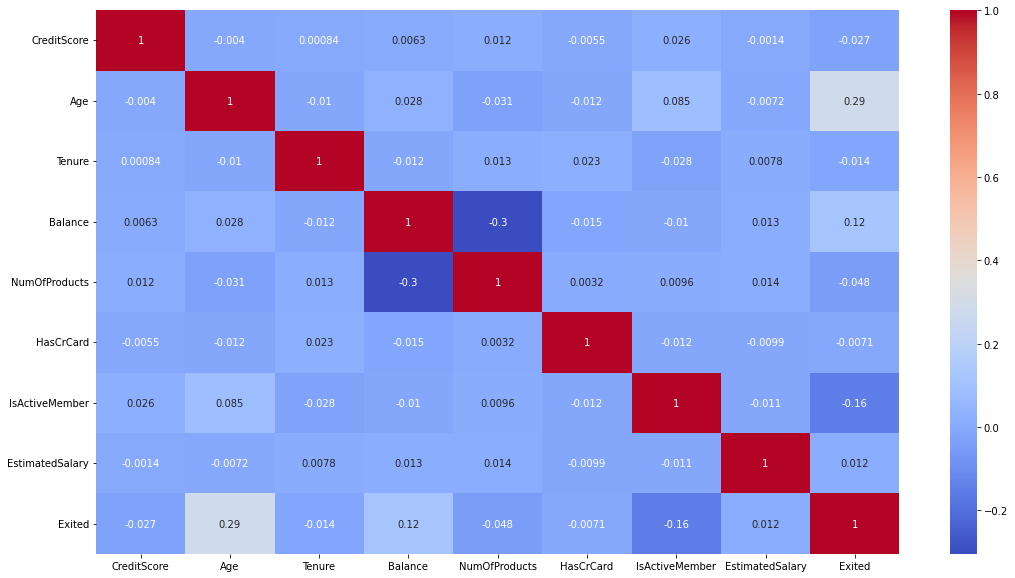

In [17]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)
plt.show()

No two columns show a correlation greater than 0.75.

Transforming Estimated Salary Column

In [19]:
conditions = [
(df['EstimatedSalary'] <= 25000),
(df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
(df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
(df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
(df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
(df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
(df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
(df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]

values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-125,000','125,000-1,50,000','1,50,000-1,75,000','1,75,000-2,00,000']
df['SalaryRange'] = np.select(conditions, values)

In [20]:
df['SalaryRange'].value_counts()

1,50,000-1,75,000    2455
125,000-1,50,000     1279
1,00,000-125,000     1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

Transforming Age Column

In [21]:
conditions = [
(df['Age'] >= 0) & (df['Age'] <= 18),
(df['Age'] >= 18) & (df['Age'] < 30),
(df['Age'] >= 30) & (df['Age'] < 40),
(df['Age'] >= 40) & (df['Age'] < 50),
(df['Age'] >= 50) & (df['Age'] < 60),
(df['Age'] >= 60)
]

values = ['Minors','18-30','30-40','40-50','50-60','>60']
df['AgeGroup'] = np.select(conditions, values)

In [22]:
df['AgeGroup'].value_counts()

30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

Univariate Analysis

<Figure size 4320x7200 with 0 Axes>

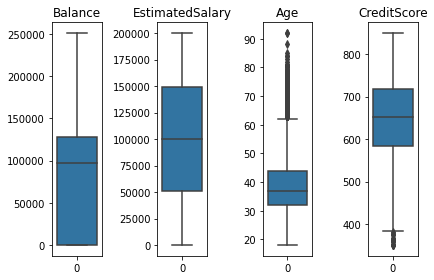

In [23]:
plt.figure(figsize=(60, 100))

columns_to_plot = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

fig, axes = plt.subplots(ncols=len(columns_to_plot))
for column, axis in zip(columns_to_plot, axes):
    sns.boxplot(data=df[column], ax=axis)
    axis.set_title(column)

plt.tight_layout()
plt.show()

Age column is skewed.

In [24]:
df['Age'].skew()

1.0113202630234552

In [25]:
df['Age1'] = np.log(df['Age'])

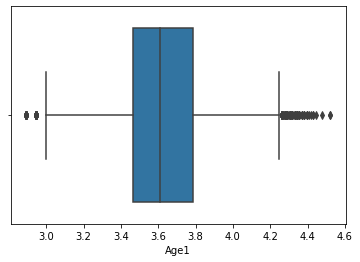

In [26]:
sns.boxplot(x=df['Age1'])
plt.show()

Bivariate Analysis

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

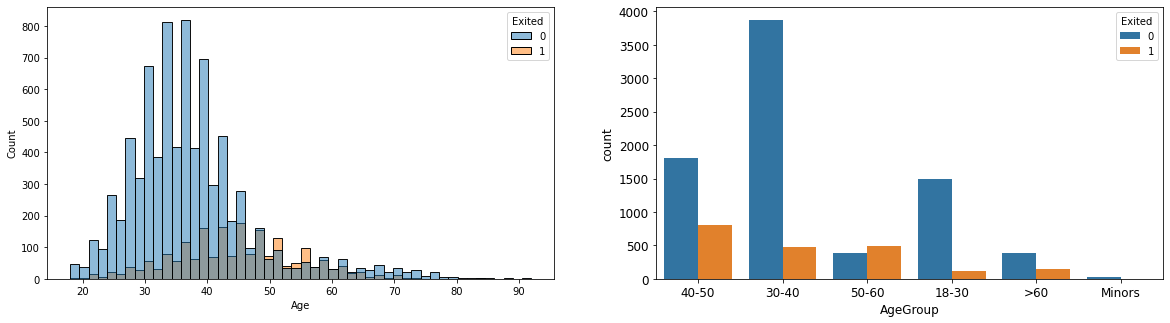

In [27]:
# Here our main interest is to get an understanding as to how the given attributes relate to the 'Exit' status.

fig, axarr = plt.subplots(1,2, figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df, x='Age',hue='Exited',bins=50,ax=axarr[0])

plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df, x='AgeGroup',hue='Exited',ax=axarr[1])

Insight: 40-50 is the age group for which churn rate is maximum. Also for age group
50-60 customers churned is more than customer retention.The bank may need to
review their target market or review the strategy for retention between the different
age groups

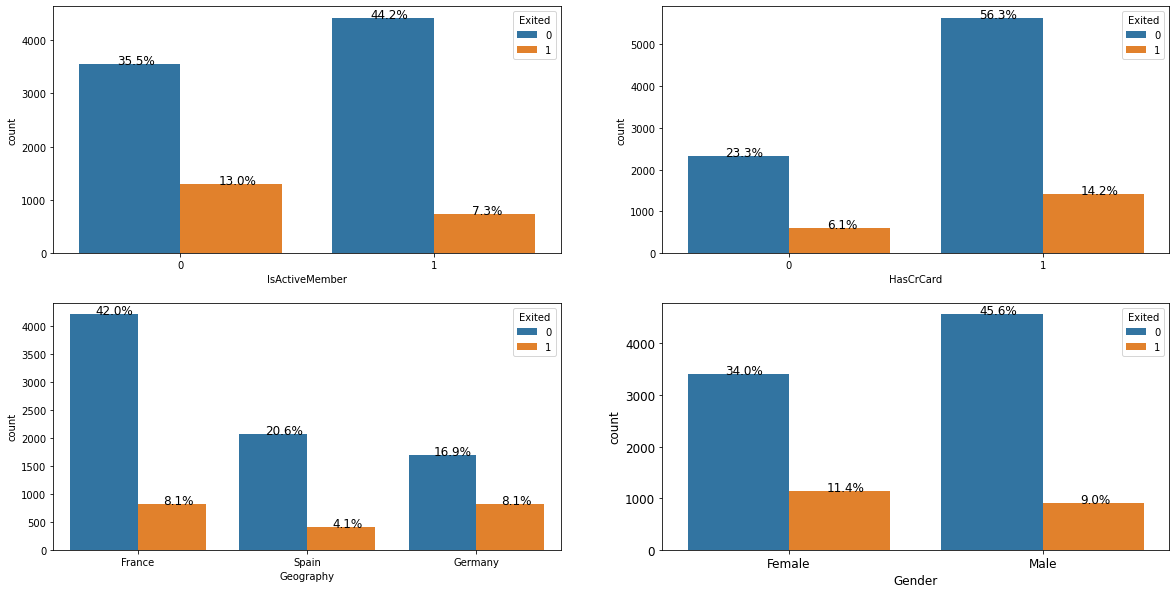

In [28]:
fig, axarr = plt.subplots(2,2, figsize=(20, 10))
plt.xticks(size=12)
plt.xlabel('Is Active Member (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=axarr[0][0])
total = len(df['IsActiveMember'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.xticks(size=12)
plt.xlabel('Has Credit Card (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='HasCrCard',hue='Exited',ax=axarr[0][1])
total = len(df['HasCrCard'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.xticks(size=12)
plt.xlabel('Geography',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='Geography',hue='Exited',ax=axarr[1][0])
total = len(df['Geography'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='Gender',hue='Exited',ax=axarr[1][1])
total = len(df['Gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.show()

1. Chances of a non-active member churning out is double the chances of an active member churning out.
Bank needs to check with the customers for being inactive , give them some offers plan.
2. Majority of the customers that churned are those with credit cards. Given that majority of the customers
have credit cards could prove this to be just a coincidence.
3. Almost half of the customers are from France followed by Spain and Germany each having 25%
customers.Hence churn rate is also maximum for France there but Germany showed the same churn
rate despite lower count of customers.
4. Male to female ratio of customers is 5:4.Clearly as observed churn probability is more for a female
customer.

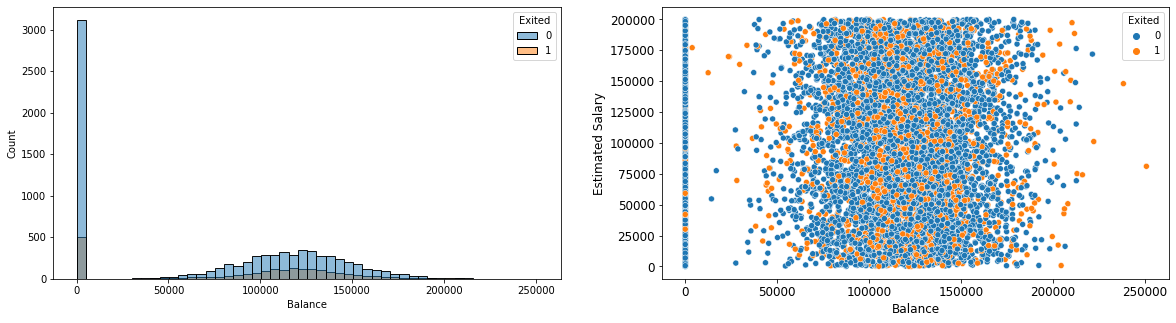

In [29]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,ax = axarr[0])
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Estimated Salary',size=12)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited',ax=axarr[1])
plt.show()

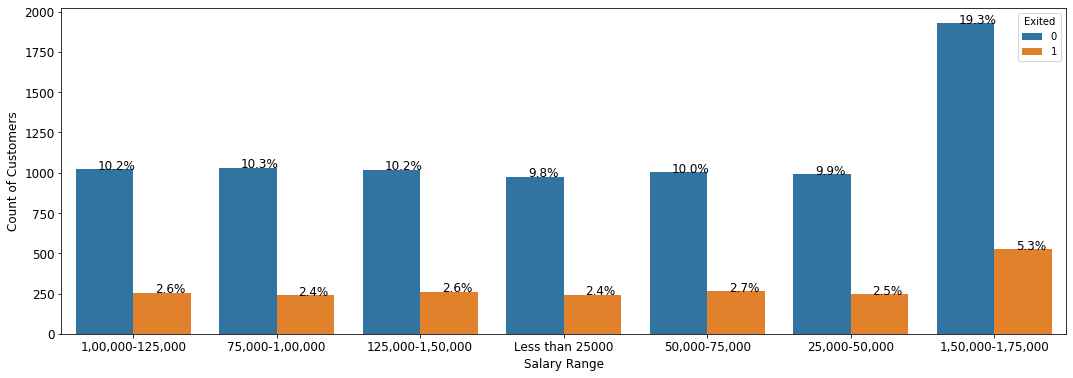

In [30]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='SalaryRange',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Salary Range',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['SalaryRange'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.show()

Insights: Around one-fourth customers have salary between 150000-175000 and more
churn rate for these customers is observed which shows bank is losing it's valuable
customers.

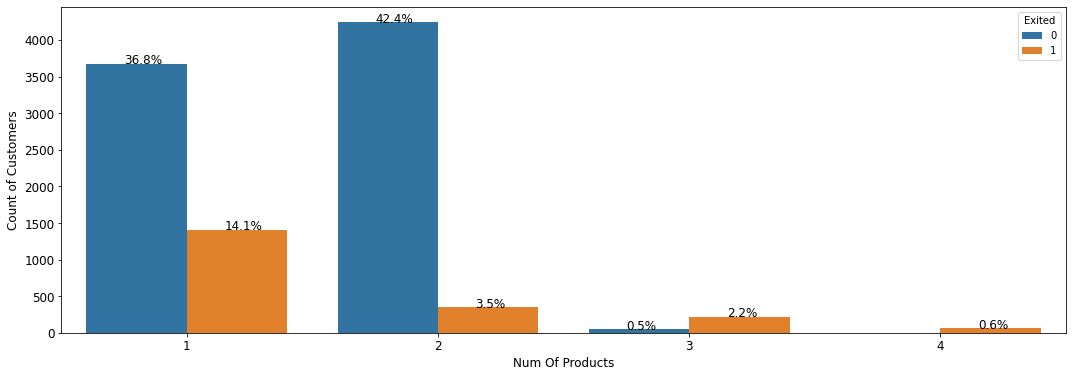

In [31]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Num Of Products',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['NumOfProducts'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.show()

Insight: Maximum customers who churned out have used 1 product only (14% out of
total 20%). Maybe bank needs to focus on convincing customers to use more of their
services and products.

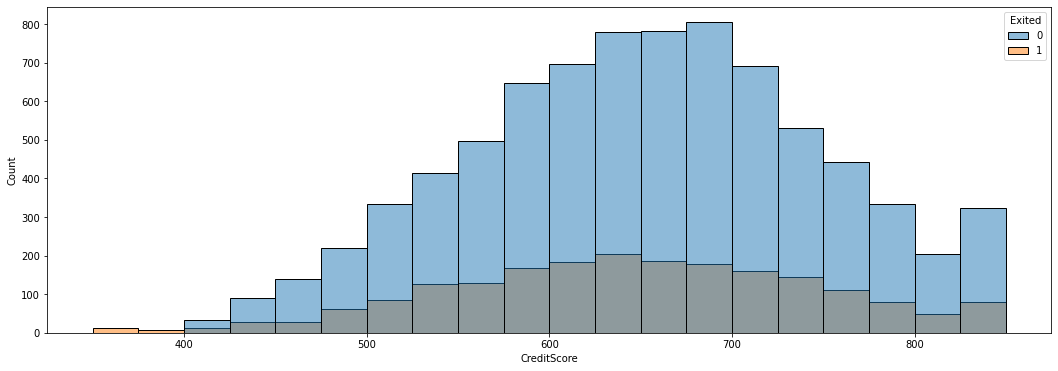

In [32]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')
plt.show()

There is no significant difference in the credit score distribution between retained and
churned customers.

In [33]:
# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logar
df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

Target check for balanced or Imbalanced data

In [34]:
round(df['Exited'].value_counts()/len(df)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

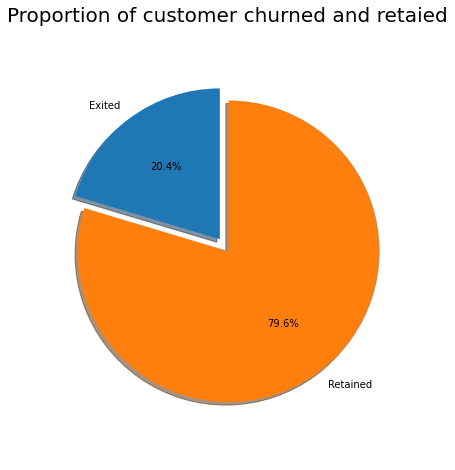

In [35]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion of customer churned and retaied', size=20)
plt.show()

80 percent of the data belongs to retained class .It is Imbalanced data .
Solution : Use SMOTE to handle this or the Precision -Recall curve should
be used not accuracy .

Predictive Behaviour Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

In [37]:
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 52)
print('X_train', len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))

X_train 8000
X_test 2000
y_train 8000
y_test 2000


In [38]:
unique, count = np.unique(y_train ,return_counts= True)
target_org_valuecount= {k:v for (k,v) in zip (unique,count)}
target_org_valuecount

{0: 6384, 1: 1616}

In [39]:
categorical_cols = ['Gender','Geography']
numerical_cols = ['Age1',
'Balance',
'NumOfProducts',
'HasCrCard',
'IsActiveMember',
'CreditScore',
'Tenure',
'EstimatedSalary']

In [40]:
# Encoding and Scaling
preprocessor = ColumnTransformer(
    transformers=[
    ('num',StandardScaler(),numerical_cols),
    ('cat',OneHotEncoder(),categorical_cols)
    ]
)

In [41]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=52)

### Logistic Model

In [42]:
logmodel = LogisticRegression()

Pipeline

In [43]:
pipe = Pipeline(steps=[('preprocessor',preprocessor),
                       ('smote',smt),
                       ('logmodel',logmodel)
                       ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('logmodel', LogisticRegression())])

In [44]:
y_predicted = pipe.predict(X_test)

In [45]:
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1579
           1       0.38      0.67      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000



In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as MSE

print("Training score: ",pipe.score(X_train, y_train))
print("Testing score: ",pipe.score(X_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.713125
Testing score:  0.701
MSE score:  0.299
Accuracy: 0.70
Precision: 0.38
Recall: 0.67
F1-score: 0.49


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predicted)

array([[1120,  459],
       [ 139,  282]])

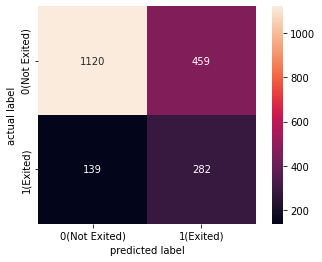

In [49]:
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
xticklabels=['0(Not Exited)', '1(Exited)'],
yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [50]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt =(fpr_dt, tpr_dt)

y_predicted = pipe.predict(X_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

In [51]:
print(fpr_dt)

[0.   0.29 1.  ]


In [52]:
print(roc_auc_dt)

(array([0.  , 0.29, 1.  ]), array([0.  , 0.67, 1.  ]))


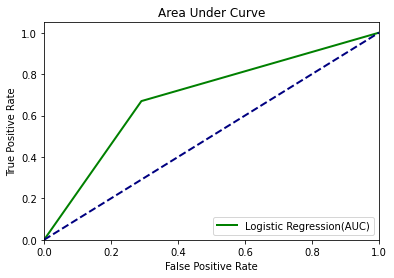

In [53]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt , color='green',lw=lw, label='Logistic Regression(AUC)') # = %0.2f)'%(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

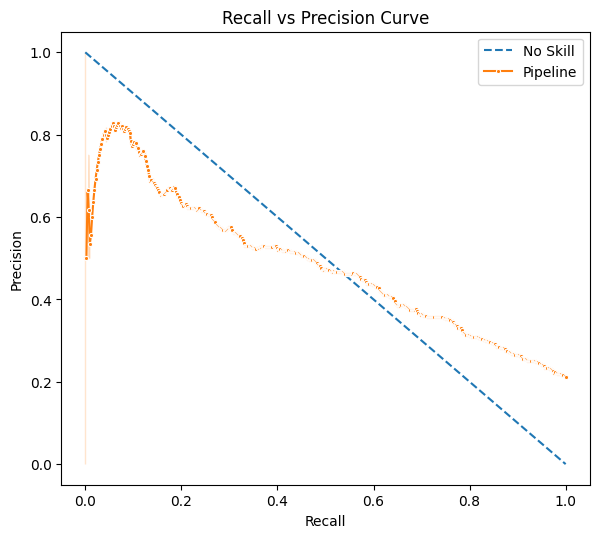

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
yhat = pipe.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
plt.figure(dpi=100, figsize=(15, 6))
plt.subplot(121)
sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
sns.lineplot(recall, precision, marker='.', label=pipe.__class__.__name__)
plt.title("Recall vs Precision Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [55]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']

model_log_report1 = pd.DataFrame(
{
'Training Score': [round(pipe.score(X_train, y_train),2)],
'Testing Score' : [round(pipe.score(X_test, y_test),2)],
'MSE score': [round(MSE(y_test,y_predicted),2)],
'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
'Precision': [round(precision_score(y_test, y_predicted),2)],
'Recall'
: [round(recall_score(y_test,y_predicted),2)],
'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
},
columns=col,index=['Logistic Regression'])

In [56]:
model_log_report1

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.7,0.3,0.7,0.38,0.67,0.49


Hyper Parameter Tuning for Descison Tree Using GridSearch CV

In [57]:
x = df.drop(columns=['Exited'])
y = df['Exited']
x['Gender'] = x['Gender'].replace({'Male':1,'Female':0})
x['Geography'] = x['Geography'].replace({'Germany':1,'France':0,'Spain':2})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [59]:
def dtree_grid_search(X,y,nfolds):

    param_grid = [{
        'criterion':['gini','entropy'],    # measures split quality
        'max_features':['auto',None],      # features considered at splits
        'max_depth':[5,6,8,10,11],         # max nodes in each tree
        'min_samples_leaf':[5,8,10,12,15], # samples required in each leaf
        'min_samples_split':[5,10,15,20]    # samples required to split node
    }]

    dtree_model = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    dtree_gscv.fit(X, y)

    return dtree_gscv.best_params_

In [60]:
get_par = dtree_grid_search(x_train,y_train, 10)
# get_par = dtree_grid_search(X_train,y_train, 10)
get_par

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 12,
 'min_samples_split': 10}

### Decision Tree Classsifier

In [64]:
# x = df.drop(columns=['Exited'])
# y = df['Exited']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)
print(len(x_train))
print(len(x_test))
print(x_train.columns)
print(x_train['Gender'].value_counts())
print(x_train['Geography'].value_counts())

8000
2000
Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Age1'],
      dtype='object')
1    4329
0    3671
Name: Gender, dtype: int64
0    3978
1    2019
2    2003
Name: Geography, dtype: int64


In [184]:
# x_test['Gender'].value_counts()
# x_test['Geography'].value_counts()
# x_test['Gender'] = x_test['Gender'].replace({'Male':1,'Female':0})
# x_test['Geography'] = x_test['Geography'].replace({'Germany':1,'France':0,'Spain':2})

In [65]:
decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, 
                                       criterion = "entropy",
                                       max_features= None,
                                       min_samples_split=15,
                                       min_samples_leaf=12)

In [66]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('smote', smt),
                       ('decision_tree', decision_tree)
                       ])

In [67]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=15,
                                        random_state=52))])

In [68]:
print(X_train.columns)
print(X_test.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Age1'],
      dtype='object')
Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Age1'],
      dtype='object')


In [69]:
y_predicted = pipe.predict(x_test)

In [70]:
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

In [71]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.78875
Testing score:  0.7885
MSE score:  0.2115
Accuracy: 0.79
Precision: 0.5
Recall: 0.76
F1-score: 0.60


In [72]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)
y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

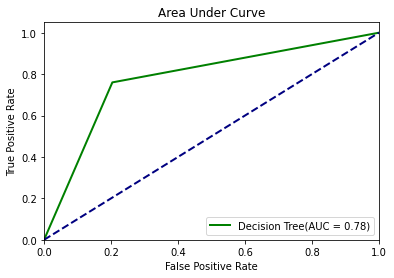

In [73]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

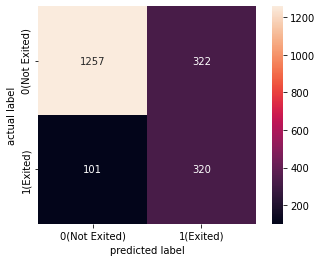

In [74]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
xticklabels=['0(Not Exited)', '1(Exited)'],
yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [75]:
model_log_report2 = pd.DataFrame(
{
'Training Score': [round(pipe.score(x_train, y_train),2)],
'Testing Score' : [round(pipe.score(x_test, y_test),2)],
'MSE score': [round(MSE(y_test,y_predicted),2)],
'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
'Precision': [round(precision_score(y_test, y_predicted),2)],
'Recall'
: [round(recall_score(y_test,y_predicted),2)],
'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
},
columns=col,index=['Decision Tree'])

Hyper-parameter Tuning for Random Forest Using
GridSearchCV

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
# x = df.drop(columns=['Exited'])
# y = df['Exited']
# x['Gender'] = x['Gender'].replace({'Male':1,'Female':0})
# x['Geography'] = x['Geography'].replace({'Germany':1,'France':0,'Spain':2})
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [77]:
def ran_for_grid_search(X,y,nfolds):
#create a dictionary of all values we want to test
    param_grid = [{
    'criterion': ['gini', 'entropy'],  # measures split quality
    'n_estimators': [50, 100, 200],    # number trees to grow
    'max_depth': [6, 8, 10],           # max nodes in each tree
    'min_samples_leaf': [5, 10, 15],   # samples required in each leaf
    'min_samples_split': [5,8,10],     # samples required to split node
}]

    rfor_model=RandomForestClassifier()
    rfor_gscv = GridSearchCV(rfor_model, param_grid, cv=nfolds)
    rfor_gscv.fit(X, y)

    return rfor_gscv.best_params_

In [78]:
best_par = ran_for_grid_search(x_train,y_train,10)
best_par

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 200}

### Random Forest Classifier

In [83]:
random_forest = RandomForestClassifier(max_depth=10,n_estimators = 200, 
                                       random_state=52,bootstrap=True,max_features=None,
                                       min_samples_split=5,min_samples_leaf=15,
                                       criterion='entropy')

In [84]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('smote', smt),
                       ('random_forest', random_forest)
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        max_features=None, min_samples_leaf=15,
                                        min_samples_split=5, n_estimators=200,
                                        random_state

In [85]:
y_predicted = pipe.predict(x_test)

In [86]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.857875
Testing score:  0.827
MSE score:  0.173
Accuracy: 0.83
Precision: 0.57
Recall: 0.72
F1-score: 0.64


In [87]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)
y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

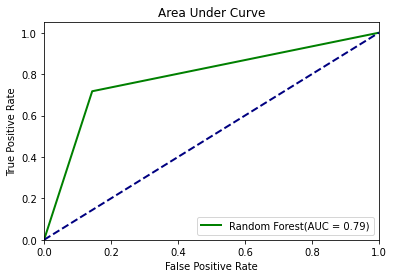

In [88]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

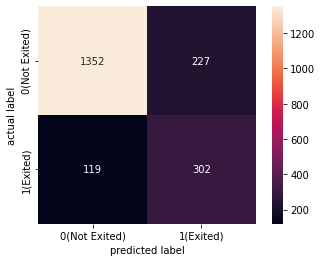

In [89]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
xticklabels=['0(Not Exited)', '1(Exited)'],
yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [90]:
model_log_report3 = pd.DataFrame(
{
'Training Score': [round(pipe.score(x_train, y_train),2)],
'Testing Score' : [round(pipe.score(x_test, y_test),2)],
'MSE score': [round(MSE(y_test,y_predicted),2)],
'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
'Precision': [round(precision_score(y_test, y_predicted),2)],
'Recall'
: [round(recall_score(y_test,y_predicted),2)],
'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
},
columns=col,index=['Random Forest'])

### Boosting Algorithms

Hyper parameter tuning using GridSearch CV

In [91]:
import xgboost as xgb

In [93]:
def xgboost_grid_search(X,y,nfolds):
#create a dictionary of all values we want to test
    param_grid = [ {
    'learning_rate': [0.01, 0.1, 0.2], # step size for model iteration
    'reg_lambda': [1, 2], # L2 regularization term; higher=more conservative
    'max_depth': [6, 8], # max number of trees deep
    'gamma': [2, 4], # minimum loss reduction on partitions; higher=more conservativ
    'subsample': [0.6, 0.8], # ratio of the training used to grow each tree
    'colsample_bytree': [0.7, 0.9], # ratio of columns when constructing each tree
    'n_estimators': [100, 200,250], # number of trees to grow
    } ]
    # XGboost model
    xgboost_model= xgb.XGBClassifier()
    #use gridsearch to test all values
    xgboost_gscv = GridSearchCV(xgboost_model, param_grid, cv=nfolds)
    #fit model to data
    xgboost_gscv.fit(X, y)
    return xgboost_gscv.best_params_

In [ ]:
best_par = xgboost_grid_search(x_train,y_train, 10)
best_par

### XGBoost

In [95]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=52,colsample_bytree= 0.7,gamma= 4,
                        learning_rate= 0.1,max_depth= 6,
                        n_estimators= 100,reg_lambda= 1,
                        subsample= 0.8)

In [97]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('smote', smt),('xgb', xgb)
])

pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=4, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               

In [98]:
y_predicted = pipe.predict(x_test)

In [99]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.878875
Testing score:  0.86
MSE score:  0.14
Accuracy: 0.86
Precision: 0.69
Recall: 0.60
F1-score: 0.64


In [100]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)
y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

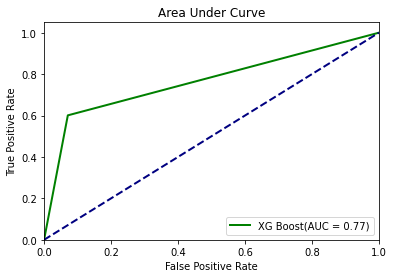

In [101]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
lw=lw, label='XG Boost(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

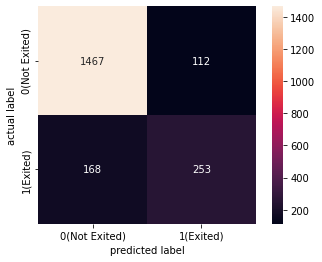

In [102]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
xticklabels=['0(Not Exited)', '1(Exited)'],
yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [103]:
model_log_report4 = pd.DataFrame(
{
'Training Score': [round(pipe.score(x_train, y_train),2)],
'Testing Score' : [round(pipe.score(x_test, y_test),2)],
'MSE score': [round(MSE(y_test,y_predicted),2)],'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
'Precision': [round(precision_score(y_test, y_predicted),2)],
'Recall'
: [round(recall_score(y_test,y_predicted),2)],
'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
},
columns=col,index=['Xgboost'])

Comparing Models

We need confidence in our positive class predictions (churn) when taking
retention actions.

In [104]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3,model_log_report4))

In [105]:
model_comp

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.70,0.30,0.70,0.38,0.67,0.49
Decision Tree,0.79,0.79,0.21,0.79,0.50,0.76,0.60
Random Forest,0.86,0.83,0.17,0.83,0.57,0.72,0.64
Xgboost,0.88,0.86,0.14,0.86,0.69,0.60,0.64
